In [206]:
# Import relevant libraraies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline
from scipy import stats

In [51]:
# Load the data from Part 1
train = pd.read_csv("train_users_3.csv")
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [52]:
country_dict = {val:num for num,val in enumerate(set(train.country_destination))}
print(country_dict)

{'ES': 0, 'AU': 1, 'IT': 2, 'NDF': 3, 'NL': 4, 'US': 5, 'DE': 6, 'FR': 7, 'other': 8, 'PT': 9, 'GB': 10, 'CA': 11}


#### Gender

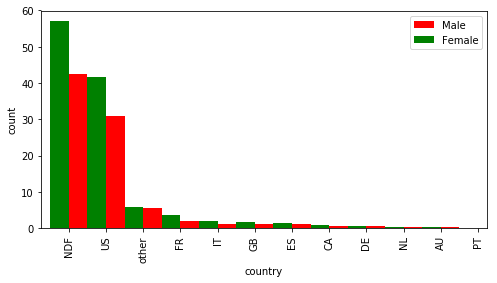

In [166]:
plt.figure(figsize=(8,4))
num_women = sum(train.gender == 'FEMALE')
num_men = sum(train.gender == 'MALE')

m_des = train.loc[train.gender == 'MALE', 'country_destination'].value_counts()/num_women*100
f_des = train.loc[train.gender == 'FEMALE', 'country_destination'].value_counts()/num_men*100

m_des.plot(kind='bar', position=0, label='Male',color = 'red')
f_des.plot(kind='bar', position=1, label='Female',color='green')

plt.legend()
plt.xlabel('country')
plt.ylabel('count')

plt.show()

There dosen't exist a 'major' bifurcaton on the basis of gender in country destinations, but an overall eyeballing a higher % of Females travelling to US compared to Males

###### Chi Square Square Significance Test for Gender vs Destination

In [215]:
chi_test_1 = train[(train.country_destination != 'NDF') & 
                   (train.country_destination != 'other') & 
                   (train.gender != 'OTHER') & 
                   (train.gender.notnull())]
chi_test_1 = chi_test_1[['id', 'gender', 'country_destination']]
chi_test_1.head()

,id,gender,country_destination
2,4ft3gnwmtx,FEMALE,US
6,lsw9q7uk0j,FEMALE,US
7,0d01nltbrs,FEMALE,US
8,a1vcnhxeij,FEMALE,US
10,yuuqmid2rp,FEMALE,US


Hypothesis Testing:
- Null Hypothesis: No relationship
- Primary Hypothesis: Relationship Exits
- Alpha = 5%

In [216]:
observed = chi_test_1.pivot_table('id', ['gender'], 'country_destination', aggfunc='count').reset_index()
del observed.columns.name
observed = observed.set_index('gender')
observed

,AU,CA,DE,ES,FR,GB,IT,NL,PT,US
gender,,,,,,,,,,
FEMALE,207,455,358,853,1962,881,1091,254,78,22694
MALE,188,477,416,677,1335,682,699,278,69,19457


In [217]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [218]:
chi2

116.87183139602567

In [219]:
p

5.830126955071572e-21

p-value/significance less than Alpha, so reject Null Hypothesis --> Relationship b/w gender and destination exists

###### Age

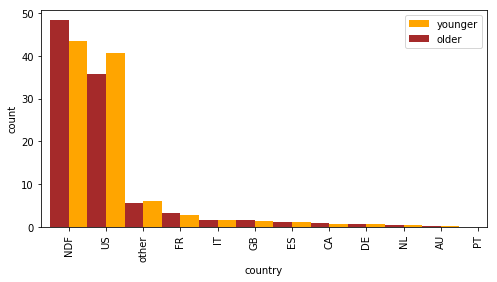

In [170]:
plt.figure(figsize=(8,4))
young = sum(train.loc[train.age <= 36, 'country_destination'].value_counts())
old = sum(train.loc[train.age > 36, 'country_destination'].value_counts())

younger_des = train.loc[train.age <= 36, 'country_destination'].value_counts()/young*100
older_des = train.loc[train.age > 36, 'country_destination'].value_counts()/old*100

younger_des.plot(kind='bar', position=0, label='younger',color = 'orange')
older_des.plot(kind='bar', position=1, label='older',color='brown')

plt.legend()
plt.xlabel('country')
plt.ylabel('count')

plt.show()

In [210]:
chi_test_2 = train[(train.country_destination != 'NDF') & 
                   (train.country_destination != 'other') & 
                   (train.age.notnull())]
chi_test_2 = chi_test_2[['id', 'age', 'country_destination']]
chi_test_2.head()

,id,age,country_destination
2,4ft3gnwmtx,56.0,US
4,87mebub9p4,41.0,US
6,lsw9q7uk0j,46.0,US
7,0d01nltbrs,47.0,US
8,a1vcnhxeij,50.0,US


In [240]:
# observed2 = chi_test_2.pivot_table('id', ['age'], 'country_destination', aggfunc='count').reset_index()
# del observed2.columns.name
# observed = observed2.set_index('age')
# observed


# chi2, p1, dof, expected = stats.chi2_contingency(observed)

chi square test results
--> Null Hypothesis

Splitting age groups based on the Mean age (~36), we see a minor preference of the young gen to stay in US 

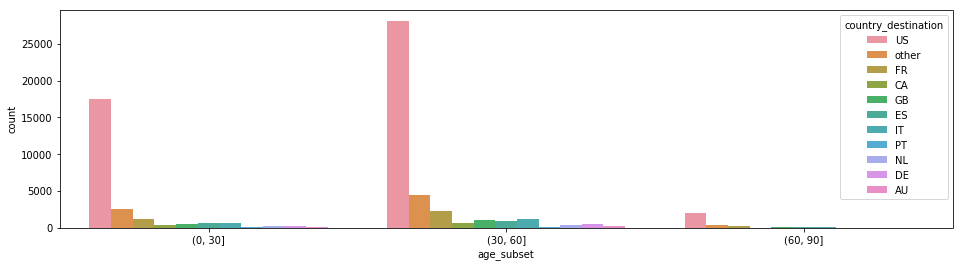

In [155]:
train['age_subset'] = pd.cut(train["age"], [0, 30, 60, 90])
plt.figure(figsize=(16,4))
sns.countplot(x="age_subset",hue="country_destination", data=train[train['country_destination'] != 'NDF'])

In [105]:
# drop age_range
train.drop(['age_subset'], axis=1, inplace=True)

#### Timeseries Analysis

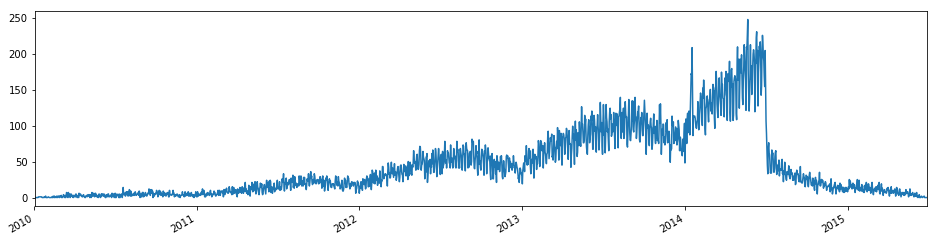

In [178]:
# First Booking date
plt.figure(figsize=(16,4))
train.date_first_booking.value_counts().plot(kind='line')

YoY increase in number of accounts created for Airbnb

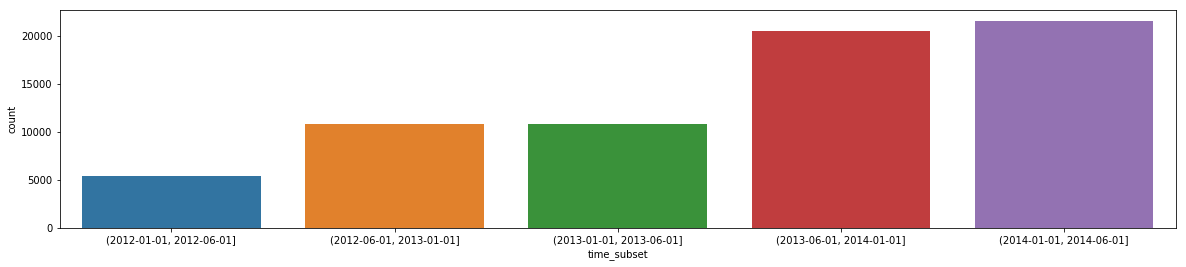

In [179]:
plt.figure(figsize=(20,4))
train.time_subset = pd.cut(train.date_first_booking, [pd.to_datetime(20120101, format='%Y%m%d'), 
                                                              pd.to_datetime(20120601, format='%Y%m%d'),
                                                              pd.to_datetime(20130101, format='%Y%m%d'), 
                                                              pd.to_datetime(20130601, format='%Y%m%d'),
                                                              pd.to_datetime(20140101, format='%Y%m%d'),
                                                              pd.to_datetime(20140601, format='%Y%m%d')])
sns.countplot(train.time_subset)

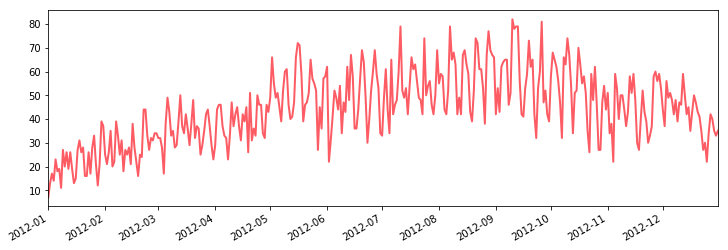

In [189]:
# Time Period 2012-13
plt.figure(figsize=(12,4))
period_12_13 = train[train.date_first_booking >= pd.to_datetime(20120101, format='%Y%m%d')]
period_12_13 = period_12_13[period_12_13.date_first_booking < pd.to_datetime(20130101, format='%Y%m%d')]
period_12_13.date_first_booking.value_counts().plot(kind='line', linewidth=2, color='#FD5C64')
plt.show()

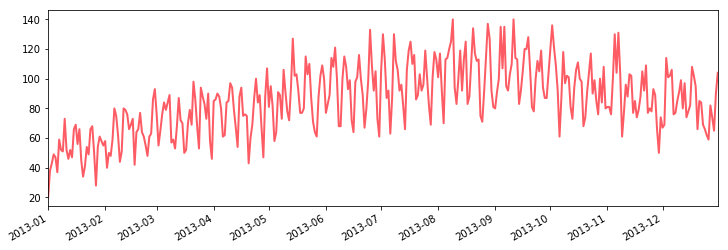

In [190]:
# Time Period 2013-14
plt.figure(figsize=(12,4))
period_13_14 = train[train.date_first_booking >= pd.to_datetime(20130101, format='%Y%m%d')]
period_13_14 = period_13_14[period_13_14.date_first_booking < pd.to_datetime(20140101, format='%Y%m%d')]
period_13_14.date_first_booking.value_counts().plot(kind='line', linewidth=2, color='#FD5C64')
plt.show()

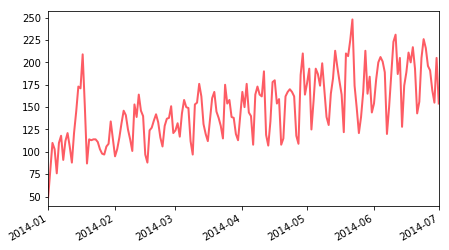

In [191]:
# Time Period 201401-201406
plt.figure(figsize=(7,4))
period_14_15 = train[train.date_first_booking >= pd.to_datetime(20140101, format='%Y%m%d')]
period_14_15 = period_14_15[period_14_15.date_first_booking <= pd.to_datetime(20140701, format='%Y%m%d')]
period_14_15.date_first_booking.value_counts().plot(kind='line', linewidth=2, color='#FD5C64')
plt.show()

All 3 time periods show a bump in the months of June-Nov, and a lower booking rate for for 1st half of the year

In [192]:
train.date_first_booking = pd.to_datetime(train.date_first_booking)

In [193]:
train.date_first_booking.describe()

count                   88908
unique                   1976
top       2014-05-22 00:00:00
freq                      248
first     2010-01-02 00:00:00
last      2015-06-29 00:00:00
Name: date_first_booking, dtype: object

In [194]:
weekdays2 = []
for date in train.date_first_booking:
    weekdays2.append(date.weekday())
weekdays2 = pd.Series(weekdays2)

Text(0.5, 0, 'Day')

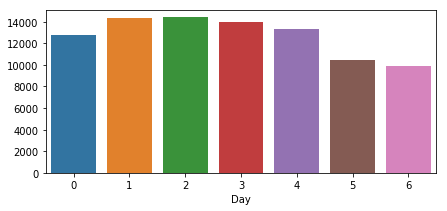

In [195]:
plt.figure(figsize=(7,3))
sns.barplot(x = weekdays2.value_counts().index, y=weekdays2.value_counts().values, order=range(0,7))
plt.xlabel('Day')

Weekedns show a lower number of bookings, and Mon-Wed seem to be hottest period when first bookings were made.

###### Date Account Created

In [196]:
train.date_account_created = pd.to_datetime(train.date_account_created)

In [197]:
train.date_account_created.describe()

count                  213451
unique                   1634
top       2014-05-13 00:00:00
freq                      674
first     2010-01-01 00:00:00
last      2014-06-30 00:00:00
Name: date_account_created, dtype: object

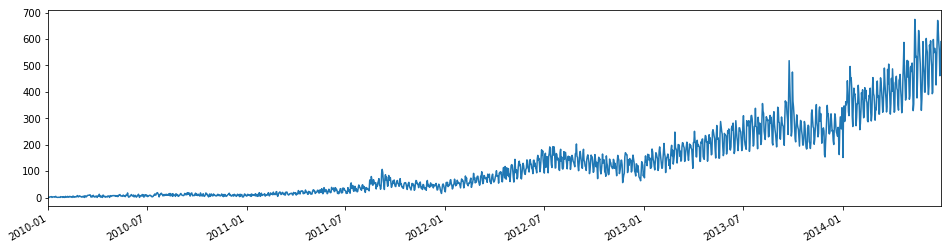

In [198]:
plt.figure(figsize=(16,4))
train.date_account_created.value_counts().plot(kind='line')

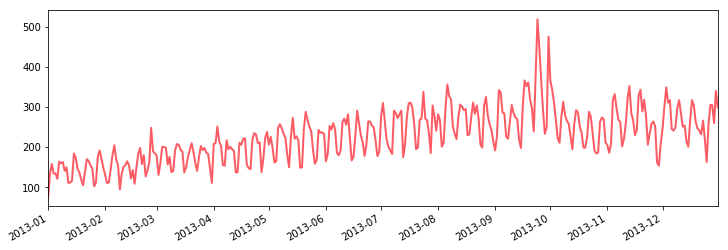

In [199]:
# Time Period 2012-13
plt.figure(figsize=(12,4))
period_13_14 = train[train.date_account_created >= pd.to_datetime(20130101, format='%Y%m%d')]
period_13_14 = period_13_14[period_13_14.date_account_created < pd.to_datetime(20140101, format='%Y%m%d')]
period_13_14.date_account_created.value_counts().plot(kind='line', linewidth=2, color='#FD5C64')
plt.show()

At a micro level the major bump seems to be in October, which coincides with the peaks First Bookings. 

In [200]:
weekdays = []
for date in train.date_account_created:
    weekdays.append(date.weekday())
weekdays = pd.Series(weekdays)

Text(0.5, 0, 'Day')

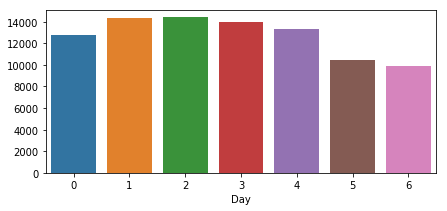

In [202]:
plt.figure(figsize=(7,3))
sns.barplot(x = weekdays2.value_counts().index, y=weekdays2.value_counts().values, order=range(0,7))
plt.xlabel('Day')

Weekday barplot is also largely similar to the date of first bookings

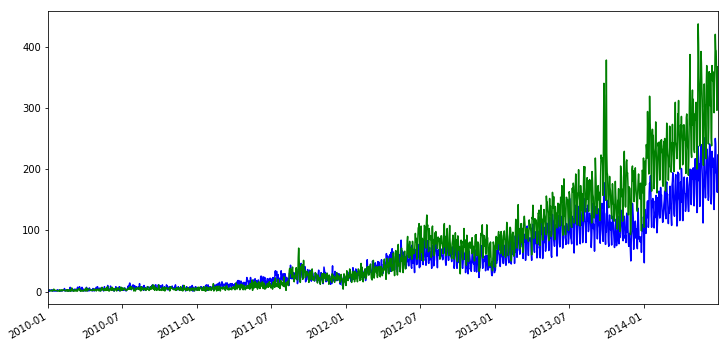

In [266]:
plt.figure(figsize=(12,6))
train[train['country_destination'] != 'NDF']['date_account_created'].value_counts().plot(kind='line', color='blue')
train[train['country_destination'] == 'NDF']['date_account_created'].value_counts().plot(kind='line',color='green')

Number of users have increased, but with those who dont book a destination have as well

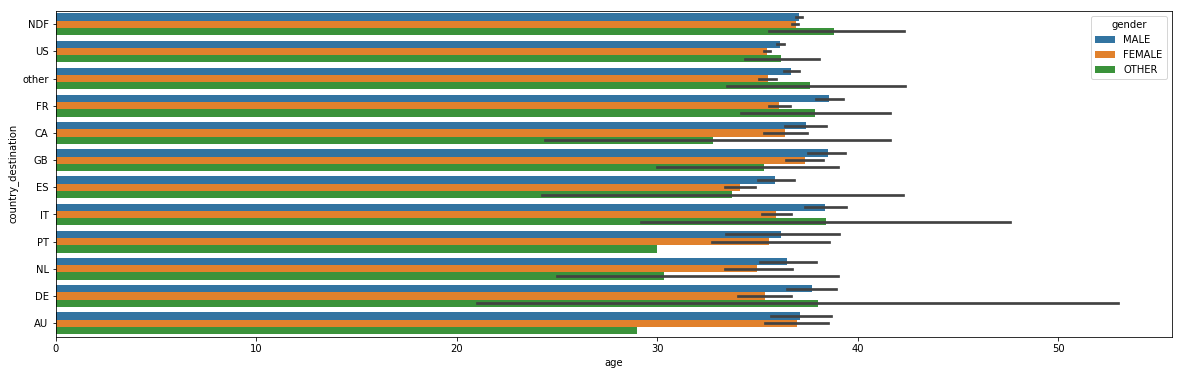

In [251]:
plt.figure(figsize=(20,6))
sns.barplot(x=train.age, y=train.country_destination, hue=train.gender, data=train)

In [275]:
train.to_csv('train_users_4.csv',index=False)

##### - Aditya